In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
sorting.close()

In [10]:
exp_name = 'MR-0280_merge_negative'
# sorting = h5py.File('../data/sorting/MR-0268/MR-0268.result.hdf5')
# sorting = h5py.File('../data/sorting/MR-0280/merge_trozo_1_MR-0280_both.result.hdf5')
sorting = h5py.File('../data/sorting/MR-0280/merge_trozo_1_MR-0280.result.hdf5')

Numero de unidades: 635
4649.59655


<IPython.core.display.Javascript object>


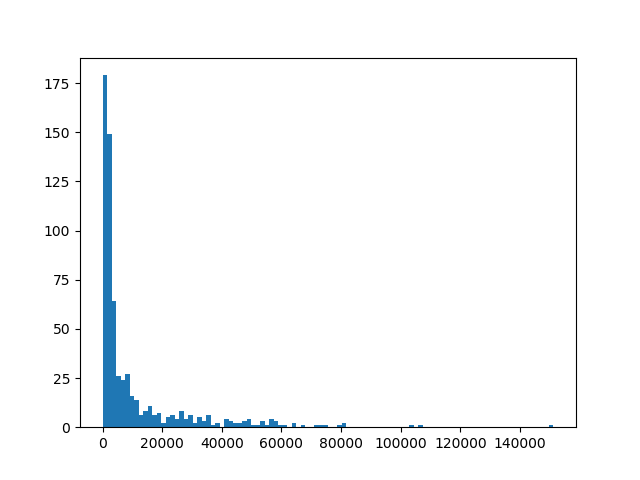

In [11]:
mm = np.zeros(len(sorting['spiketimes']))
nspk = np.zeros(len(sorting['spiketimes']))
for kidx ,key in enumerate(sorting['spiketimes']):
    spk = sorting['spiketimes'][key][...]
    mm[kidx] = spk.max() if spk.any() else 0
    nspk[kidx] = spk.size
print('Numero de unidades: {}'.format(kidx))
print(mm.max()/20000)

plt.figure()
h = plt.hist(nspk,bins=100)

<IPython.core.display.Javascript object>


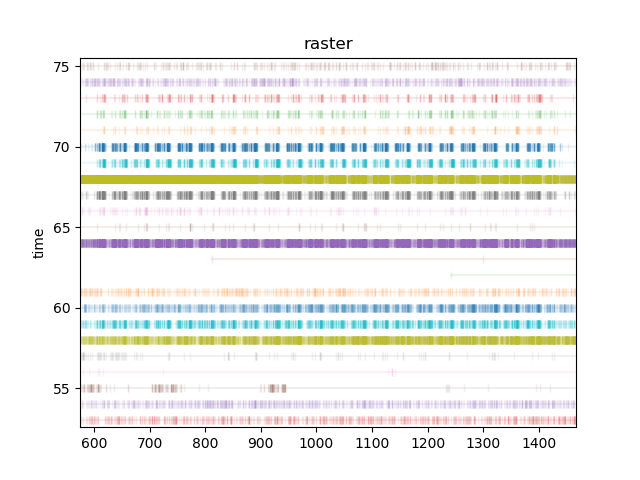

In [12]:
unit = list(sorting['spiketimes'])[100:200]

fig, ax = plt.subplots()
for kidx, key in enumerate(unit):
    spk = sorting['spiketimes'][key][...]/20000
    ax.plot(spk, np.full(spk.shape, kidx), marker='|',alpha=0.1)
ax.set_title('raster')
# ax.legend(['data',''])
ax.set_ylabel('time')
# ax.set_xlim(0,9000)
plt.savefig('../figures/raster_degu_'+exp_name+'.png')

<IPython.core.display.Javascript object>


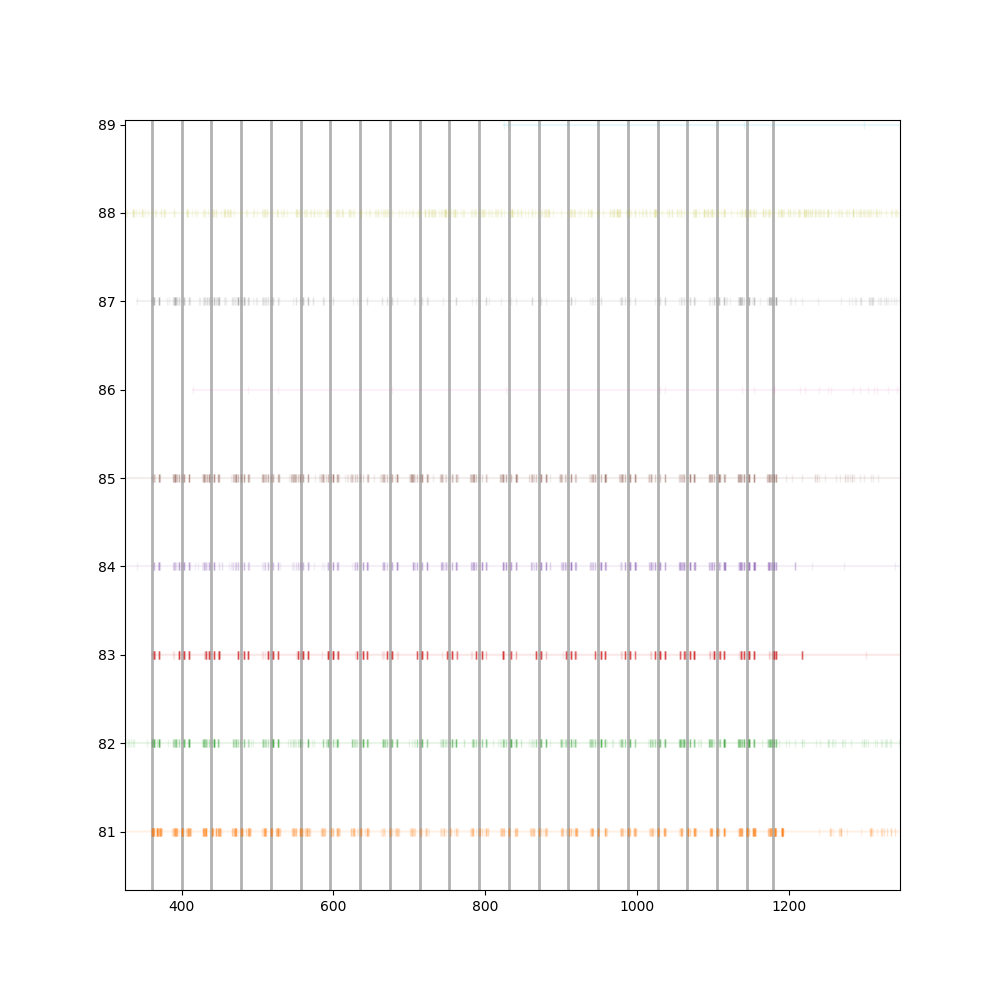

In [29]:
start =3635.5-60
end =3983.05
unit = list(sorting['spiketimes'])
# times = [1508,2348,3625,4574,5473,6800,7772]
# times = [7222492, 8005382, 8788272, 9571162, 10354051, 11136941, 11920165, 12703055, 13485944, 14268834, 15051724, 15834613, 16617503, 17400392, 18184286, 18967176, 19750065, 20532955, 21315844, 22098734, 22881623]
times = {7222492, 8005382, 8788272, 9571162, 10354051, 11136941, 11920165, 12703055, 13485944, 14268834, 15051724, 15834613, 16617503, 17400392, 18184286, 18967176, 19750065, 20532955, 21315844, 22098734, 22881623, 23584516}

plt.figure(figsize=(10,10))
for kidx, key in enumerate(unit[:100]):
    spk = sorting['spiketimes'][key][...]/20000
#     filter_spk = (spk > start) & (spk < end)
#     plt.plot(spk[filter_spk], kidx*np.ones_like(spk[filter_spk]), marker='|',alpha=0.1)
    plt.plot(spk, kidx*np.ones_like(spk), marker='|',alpha=0.1)


for ktime in times:
    plt.vlines(ktime/20000.0,0,100,color='k',lw=2, alpha=0.3)

# plt.savefig('17-05-2018.png')

<IPython.core.display.Javascript object>


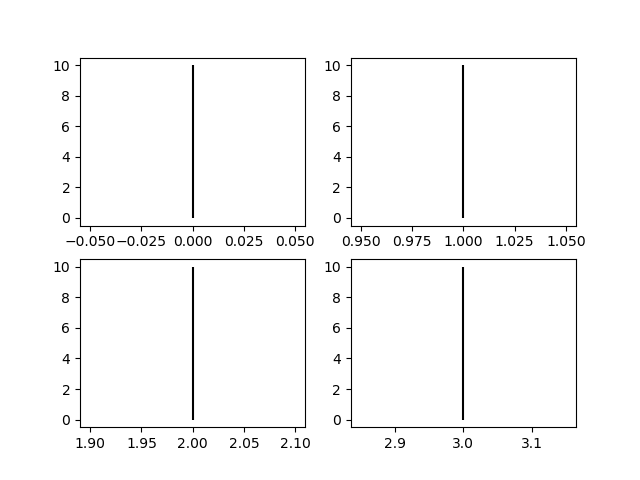

AxesSubplot(0.125,0.53;0.352273x0.35)
AxesSubplot(0.547727,0.53;0.352273x0.35)
AxesSubplot(0.125,0.11;0.352273x0.35)
AxesSubplot(0.547727,0.11;0.352273x0.35)


In [11]:
fig, ax = plt.subplots(2,2)
for kidx, kaxis in enumerate(ax.flatten()):
    kaxis.vlines(kidx,0,10)
    print(kaxis)

<IPython.core.display.Javascript object>


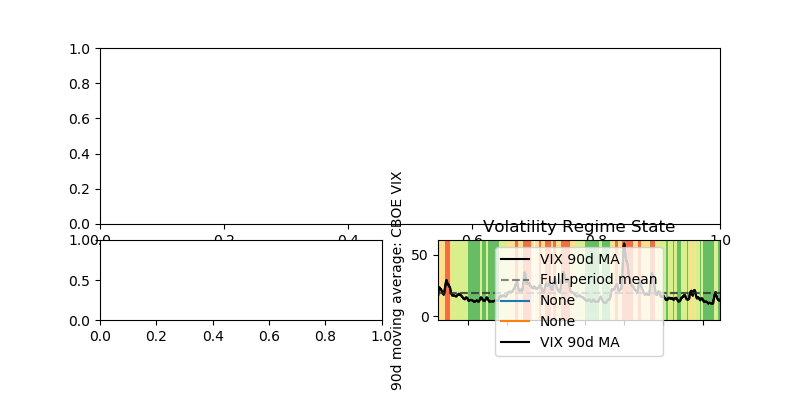

### A Burst of Color: imshow() and matshow()

In [26]:
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

In [27]:
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)
sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}
{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}
{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


<IPython.core.display.Javascript object>


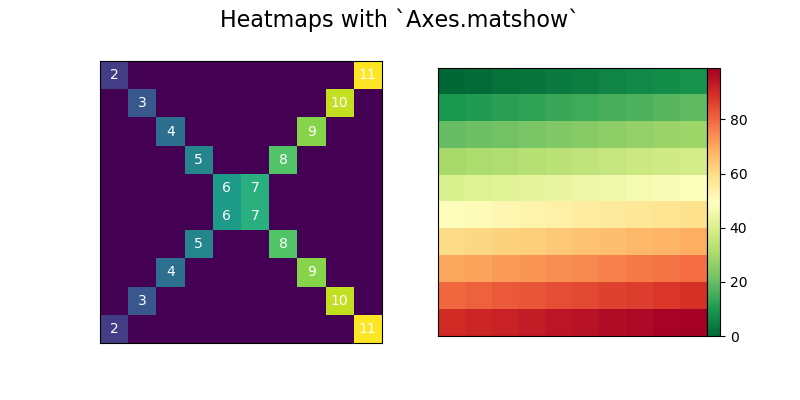

In [28]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16)

### gridaspect

In [29]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')



In [30]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]]

ValueError: too many values to unpack (expected 2)

In [ ]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

In [ ]:
gridsize = (3, 2)
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))



In [ ]:
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')


### Plotting in Pandas

In [22]:
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

print(type(ax))
print(id(plt.gca()) == id(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>
True


In [23]:
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
     ax.fill_between(ma.index, 0, 1, where=state==i,
                     facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')